<a href="https://colab.research.google.com/github/dainaklis/PySpark/blob/main/Darbdaviai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT AND INSTAL**

In [1]:
!pip install pyspark
!pip install --upgrade matplotlib

In [2]:
from pyspark.sql import functions as F, Row, SparkSession
from pyspark.sql.functions import expr, col
from pyspark.sql.functions import *
from pyspark.sql import  SQLContext
from pyspark.sql import types 
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pyspark.sql.functions as func

# **ANALIZUOJAM**

In [3]:
spark = SparkSession.builder.appName("MySecondApp").getOrCreate()
st = spark.read.csv("AtvejaiPagal.csv", header="true", inferSchema=True)

need = st.select("apskritis","darbuotojai","atvejai_viso","atvejai_14d","norma_14d","testai_14d","veiklos_pobudis")
need.show(truncate=False, n=10)
need.printSchema()

# need.toPandas()

+-------------------+-----------+------------+-----------+---------+----------+--------------------------------------------------+
|apskritis          |darbuotojai|atvejai_viso|atvejai_14d|norma_14d|testai_14d|veiklos_pobudis                                   |
+-------------------+-----------+------------+-----------+---------+----------+--------------------------------------------------+
|Utenos apskr.      |238        |83          |27         |3        |154       |Vielos gaminių, grandinių ir spyruoklių gamyba    |
|Vilniaus apskr.    |160        |54          |22         |3        |37        |Viešųjų ryšių ir komunikacijos veikla             |
|Alytaus apskr.     |159        |72          |19         |4        |83        |Buitinių elektrinių aparatų ir prietaisų gamyba   |
|Vilniaus apskr.    |1904       |840         |27         |24       |767       |Ligoninių veikla                                  |
|Marijampolės apskr.|279        |47          |16         |4        |45        |Liet

In [4]:
need.describe().show(truncate=False)

+-------+--------------+-----------------+------------------+------------------+-----------------+-----------------+---------------------------------------------------------+
|summary|apskritis     |darbuotojai      |atvejai_viso      |atvejai_14d       |norma_14d        |testai_14d       |veiklos_pobudis                                          |
+-------+--------------+-----------------+------------------+------------------+-----------------+-----------------+---------------------------------------------------------+
|count  |3266          |3342             |3342              |3342              |3342             |3340             |3331                                                     |
|mean   |null          |160.6376421304608|28.727707959305803|2.3497905445840814|2.826750448833034|27.75958083832335|null                                                     |
|stddev |null          |439.9387716182878|80.10760911103677 |3.138244211264703 |5.315451279211243|81.14866790225219|null     

In [5]:
need.select("apskritis", "darbuotojai","atvejai_viso").summary("count", "mean", "max").show(truncate=False)

+-------+--------------+-----------------+------------------+
|summary|apskritis     |darbuotojai      |atvejai_viso      |
+-------+--------------+-----------------+------------------+
|count  |3266          |3342             |3342              |
|mean   |null          |160.6376421304608|28.727707959305803|
|max    |Šiaulių apskr.|12725            |1825              |
+-------+--------------+-----------------+------------------+



In [6]:
sumApskriciu = need.groupBy("apskritis").sum()

# Apskritys, kurios turi daugiausia darbuotoju
sumApskriciu.sort(desc("sum(darbuotojai)")).limit(10).show(truncate=False)

# Apskritys, kur buvo daugiausiai atveju
sumApskriciu.sort(desc("sum(atvejai_viso)")).limit(10).show(truncate=False)

# Apskritys, kur buvo daugiausiai atveju 14d
sumApskriciu.sort(desc("sum(atvejai_14d)")).limit(10).show(truncate=False)


+-------------------+----------------+-----------------+----------------+--------------+---------------+
|apskritis          |sum(darbuotojai)|sum(atvejai_viso)|sum(atvejai_14d)|sum(norma_14d)|sum(testai_14d)|
+-------------------+----------------+-----------------+----------------+--------------+---------------+
|Vilniaus apskr.    |266413          |44283            |2975            |4189          |39896          |
|Kauno apskr.       |97757           |17460            |1309            |1396          |15515          |
|Klaipėdos apskr.   |57073           |11332            |1347            |1687          |14719          |
|Šiaulių apskr.     |27579           |5225             |570             |611           |5657           |
|Panevėžio apskr.   |20262           |4164             |275             |218           |3827           |
|Telšių apskr.      |19995           |3751             |443             |497           |4653           |
|Marijampolės apskr.|13243           |2570             

In [7]:
# Grupuojam pagal veiklos pabudi
sumVeiklos = need.groupBy("veiklos_pobudis").sum()

# VEIKLOS, kurios turi daugiausia darbuotoju
sumVeiklos.sort(desc("sum(darbuotojai)")).limit(10).show(truncate=False)

# VEIKLOS, kur buvo daugiausiai atveju
sumVeiklos.sort(desc("sum(atvejai_viso)")).limit(10).show(truncate=False)

# VEIKLOS, kur buvo daugiausiai atveju 14d
sumVeiklos.sort(desc("sum(atvejai_14d)")).limit(10).show(truncate=False)

+---------------------------------------------------------------------------------------------+----------------+-----------------+----------------+--------------+---------------+
|veiklos_pobudis                                                                              |sum(darbuotojai)|sum(atvejai_viso)|sum(atvejai_14d)|sum(norma_14d)|sum(testai_14d)|
+---------------------------------------------------------------------------------------------+----------------+-----------------+----------------+--------------+---------------+
|Ligoninių veikla                                                                             |36504           |10863            |301             |481           |9721           |
|Mažmeninė prekyba nespecializuotose parduotuvėse, kuriose vyrauja maistas, gėrimai ir tabakas|32361           |4602             |255             |417           |5283           |
|Vidurinis ugdymas                                                                            |16896     

In [137]:
# AVERAGE
avgAllVak = need.groupBy("veiklos_pobudis").avg()
avgAllVak.sort(desc("avg(atvejai_viso)")).limit(10).show(truncate=False)

+--------------------------------------------------------------------------+------------------+-----------------+-----------------+------------------+-----------------+
|veiklos_pobudis                                                           |avg(darbuotojai)  |avg(atvejai_viso)|avg(atvejai_14d) |avg(norma_14d)    |avg(testai_14d)  |
+--------------------------------------------------------------------------+------------------+-----------------+-----------------+------------------+-----------------+
|Pašto pagal įpareigojimą teikti universaliąsias paslaugas atliekama veikla|4029.0            |619.0            |20.0             |48.0              |214.0            |
|Keleivių vežimas miesto arba priemiestiniu sausumos transportu            |1974.0            |476.0            |15.0             |25.0              |637.0            |
|Ligoninių veikla                                                          |1073.6470588235295|319.5            |8.852941176470589|14.147058823529411|285.9

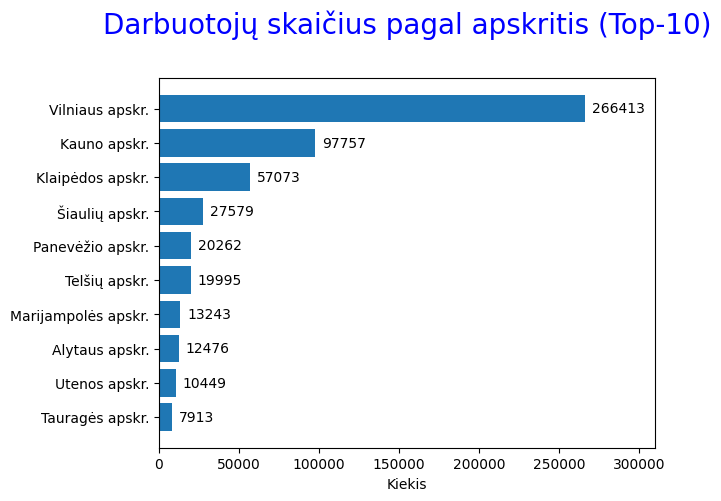

In [169]:
# Darbuotojų skaičius pagal apskritis (Top-10)

plt.rcdefaults()
fig, ax = plt.subplots()

# Apskritys, kurios turi daugiausia darbuotoju
sumAllNew = sumApskriciu.sort(desc("sum(darbuotojai)"))

# #Creating Table
sumAllNew.limit(10).registerTempTable('sumDarbuotoju')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from sumDarbuotoju").toPandas()

apskritis = df1['apskritis']
darbuotojuSk = df1['sum(darbuotojai)']

hbars = ax.barh(apskritis, darbuotojuSk, align='center')
ax.set_yticks(apskritis)
ax.set_yticklabels(apskritis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Kiekis')
ax.set_title('Darbuotojų skaičius pagal apskritis (Top-10)', fontsize=20, y=1.1, color="blue")

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%g', padding=5)
ax.set_xlim(right=310000)

plt.show()

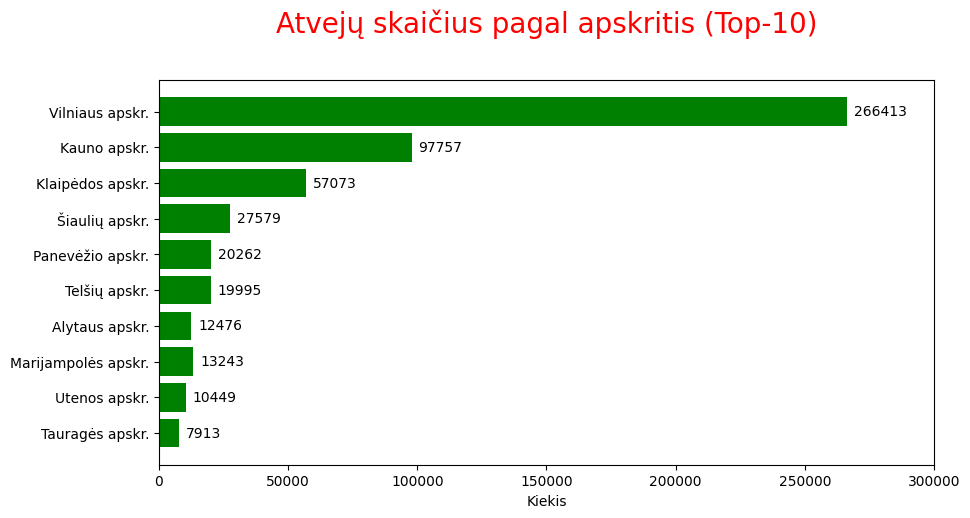

In [166]:
# Apskritys, kur buvo daugiausiai atveju

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,5))

atvejuSum = sumApskriciu.sort(desc("sum(atvejai_viso)"))

# #Creating Table
atvejuSum.limit(10).registerTempTable('atvejuSum')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from atvejuSum").toPandas()

apskritis = df1['apskritis']
atvejuSK = df1['sum(darbuotojai)']

hbars = ax.barh(apskritis, atvejuSK, align='center', color="g")
ax.set_yticks(apskritis)
ax.set_yticklabels(apskritis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Kiekis')
ax.set_title('Atvejų skaičius pagal apskritis (Top-10)', fontsize=20, y=1.1, color="red")

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%g', padding=5)
ax.set_xlim(right=300000)

plt.show()

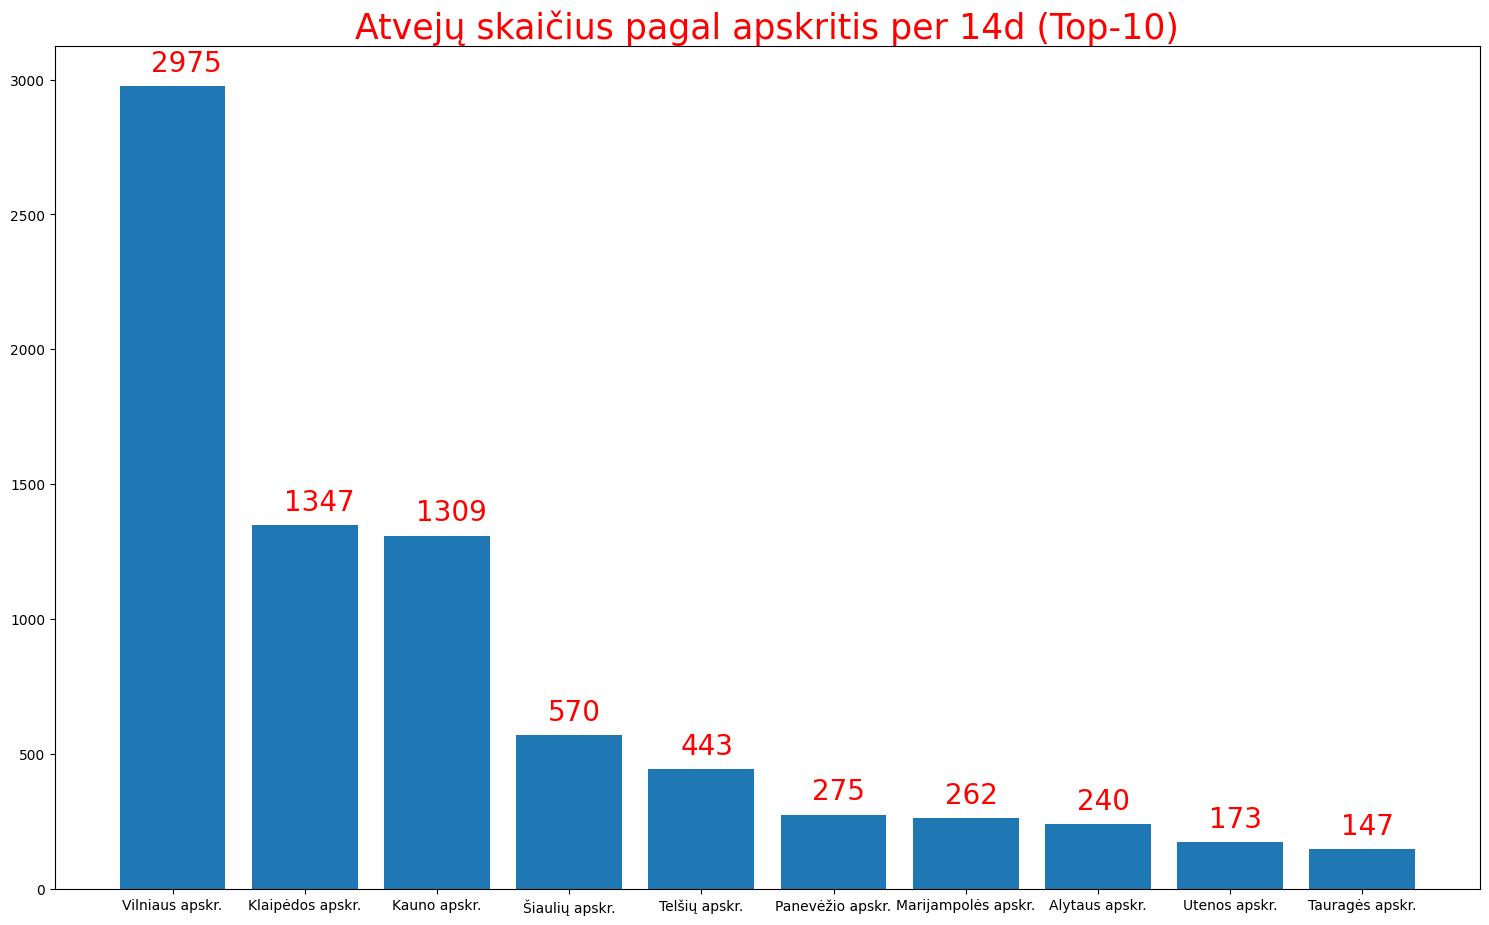

In [184]:
# Apskritys, kur buvo daugiausiai atveju 14d

sumApsk = sumApskriciu.sort(desc("sum(atvejai_14d)"))

#Creating Table
sumApsk.limit(10).registerTempTable('sumApsk')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from sumApsk").toPandas()

apskritis = df1['apskritis']
atvejuSKApsk = df1['sum(atvejai_14d)']

N = apskritis
atvejuSKApsk

#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (15,9))

ax.bar(N,atvejuSKApsk,width=0.8)

#Now the trick is here.
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(atvejuSKApsk):
    plt.text(x=index-0.16 , y =data+55 , s=f"{data}" , fontdict=dict(fontsize=20), color="r")
plt.tight_layout()

ax.set_title('Atvejų skaičius pagal apskritis per 14d (Top-10)', fontsize=25, y=1, color="red")
plt.xticks(rotation=0)

plt.show()

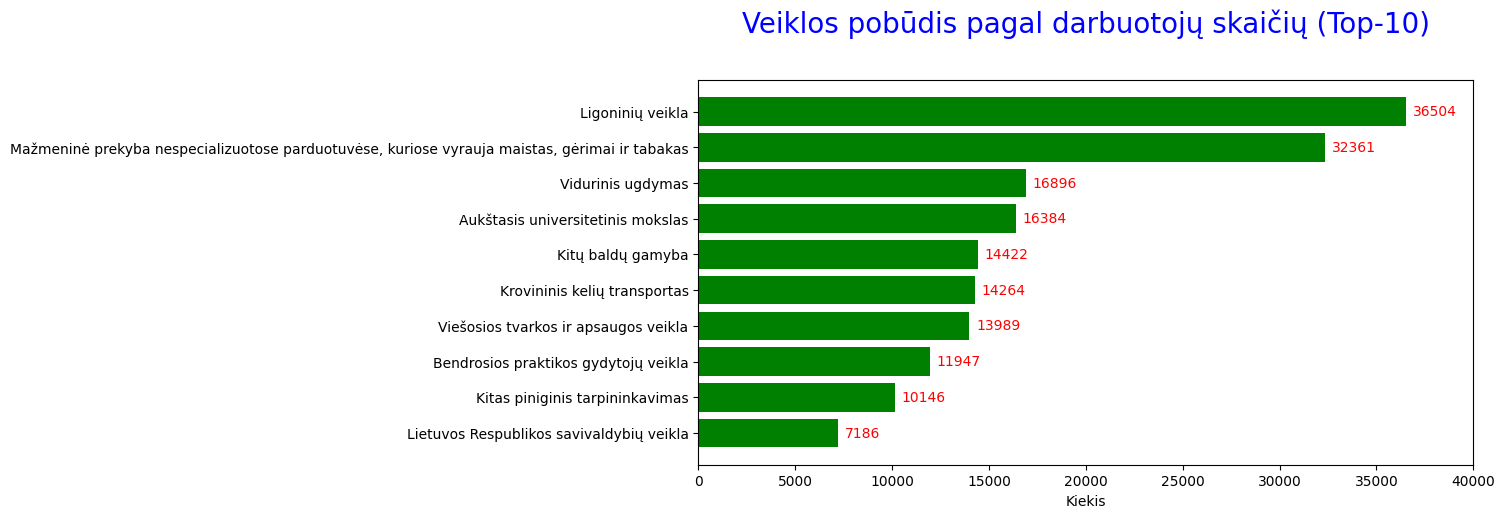

In [161]:
# VEIKLOS, kurios turi daugiausia darbuotoju
sumAllVeiklos = sumVeiklos.sort(desc("sum(darbuotojai)"))


plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,5))

# #Creating Table
sumAllVeiklos.limit(10).registerTempTable('AllVeiklos')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from AllVeiklos").toPandas()

veiklosPobudis = df1['veiklos_pobudis']
sumDarbuotojai = df1['sum(darbuotojai)']

hbars = ax.barh(veiklosPobudis, sumDarbuotojai, align='center', color="g")
ax.set_yticks(veiklosPobudis)
ax.set_yticklabels(veiklosPobudis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Kiekis')
ax.set_title('Veiklos pobūdis pagal darbuotojų skaičių (Top-10)', fontsize=20, y=1.1, color="b")

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%g', padding=5, color="r")
ax.set_xlim(right=40000)


plt.show()

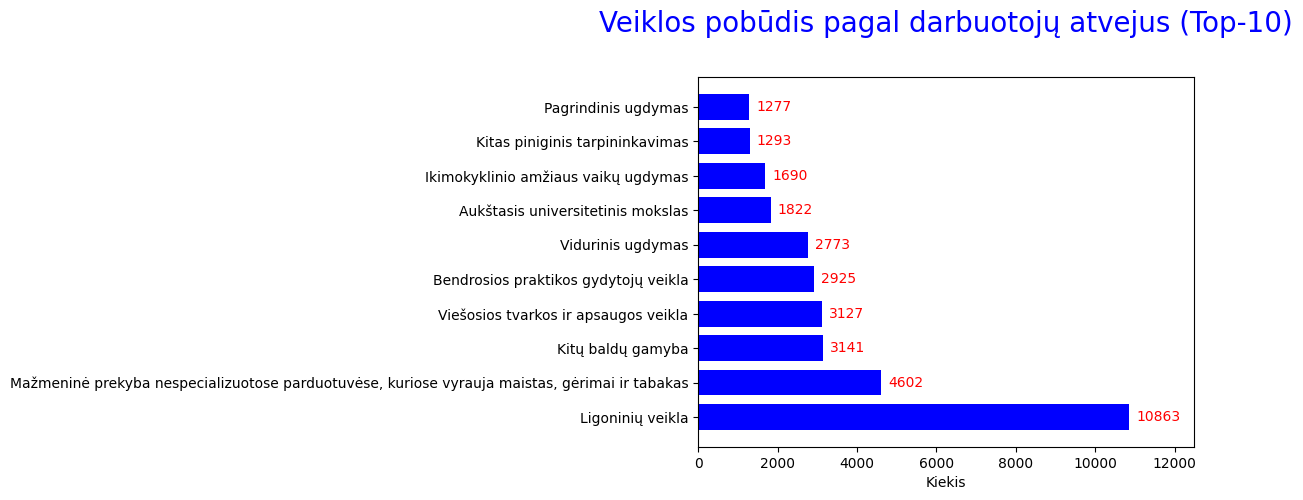

In [157]:
# VEIKLOS, kur buvo daugiausiai atveju
sumaAtvejuVeikla = sumVeiklos.sort(desc("sum(atvejai_viso)"))

#Creating Table
sumaAtvejuVeikla.limit(10).registerTempTable('sumAtvejuVeikla')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from sumAtvejuVeikla").toPandas()

x = df1['veiklos_pobudis']
y = df1['sum(atvejai_viso)']

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y)) 

barSk = ax.barh(ind, y, width, color="blue")

ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
plt.title('Veiklos pobūdis pagal darbuotojų atvejus (Top-10)', fontsize=20, y=1.1, color="b")
plt.xlabel('Kiekis')
# plt.ylabel("") 

ax.bar_label(barSk, fmt='%g', padding=5, color="r")
ax.set_xlim(right=12500)

plt.show()


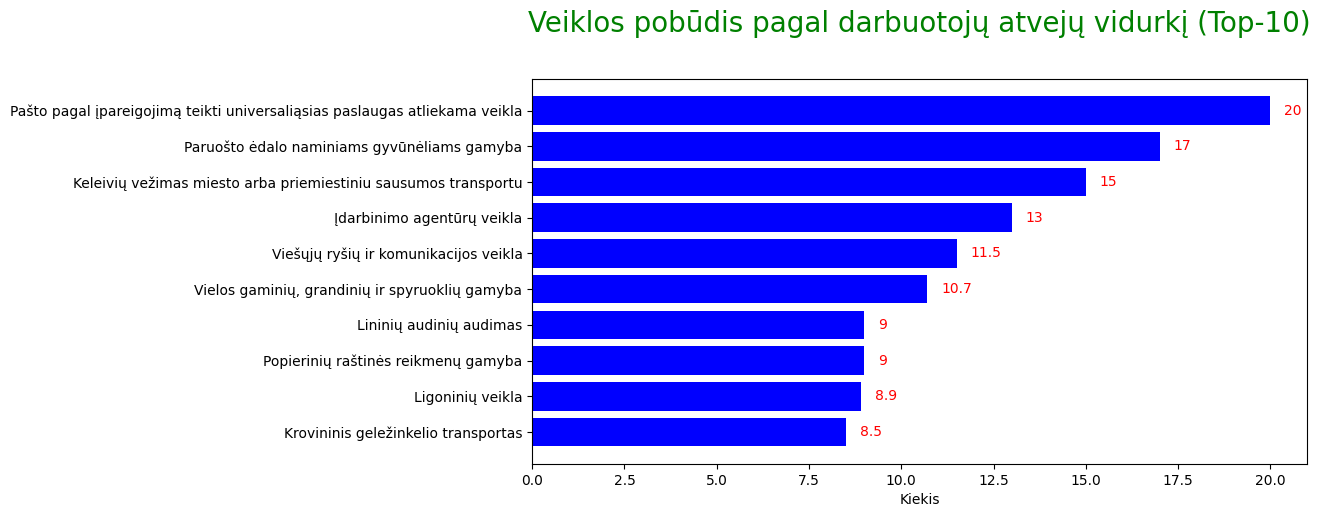

In [175]:
# Atveju skaiciaus 14d avg pagal veiklos pobudi
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,5))


avgDarb = avgAllVak.sort(desc("avg(atvejai_14d)"))
df3 = avgDarb.withColumn("avg(atvejai_14d)", func.round(avgDarb["avg(atvejai_14d)"],1))

# #Creating Table
df3.limit(10).registerTempTable("avgDarb")
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from avgDarb").toPandas()

veiklosPobudis = df1["veiklos_pobudis"]
avgAtveju = df1["avg(atvejai_14d)"]

hbars = ax.barh(veiklosPobudis, avgAtveju, color="b")
ax.set_yticks(veiklosPobudis)
ax.set_yticklabels(veiklosPobudis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Kiekis')
ax.set_title('Veiklos pobūdis pagal darbuotojų atvejų vidurkį (Top-10)', fontsize=20, y=1.1, color="g")

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%g', padding=10, color="r")
ax.set_xlim(right=21)

plt.show()